In [1]:
import numpy as np
import scipy.fftpack as fourier
import matplotlib
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import pyaudio as pa 
import struct 
import statsmodels.api as sm
from scipy.signal import find_peaks

In [4]:
hzInicialFa = 21.826
hzInicialFaS = 23.125
hzInicialSol = 24.50
hzInicialSolS = 25.96
hzInicialLa = 27.50
hzInicialLaS = 29.14
hzInicialSi = 30.87
hzInicialDo = 32.7
hzInicialDoS = 34.65
hzInicialRe = 36.71
hzInicialReS = 38.89
hzInicialMi = 41.2

In [5]:
#DEFINICION DE LOS Hz en un formato aproximado gracias a la funcion round()

#---Llenado Do aproximacion---#

Do2 = np.array([0], dtype=int)

Do2 = np.append(Do2, round(hzInicialDo), axis=None)

for i in [2,3,4,5,6,7,8]:
    Do2 = np.append(Do2, Do2[(i-1)]*2)

    #---Llenado DoS---#

DoS2 = np.array([0], dtype=int)

DoS2 = np.append(DoS2, round(hzInicialDoS), axis=None)

for i in [2,3,4,5,6,7,8]:
  DoS2 = np.append(DoS2, DoS2[(i-1)]*2)

#---Llenado Re---#  

Re2 = np.array([0], dtype=int)

Re2 = np.append(Re2, round(hzInicialRe), axis=None)

for i in [2,3,4,5,6,7,8]:
  Re2 = np.append(Re2, Re2[(i-1)]*2)

#---Llenado ReS---#  

ReS2 = np.array([0], dtype=int)

ReS2 = np.append(ReS2, round(hzInicialReS), axis=None)

for i in [2,3,4,5,6,7,8]:
  ReS2 = np.append(ReS2, ReS2[(i-1)]*2)

#---Llenado Mi---#  

Mi2 = np.array([0], dtype=int)

Mi2 = np.append(Mi2, round(hzInicialMi), axis=None)

for i in [2,3,4,5,6,7,8]:
  Mi2 = np.append(Mi2, Mi2[(i-1)]*2)

#---Llenado Fa---#  
hzFa= round(hzInicialFa)
Fa2 = np.array([hzFa], dtype=int)

for i in [1,2,3,4,5,6,7,8]:
  Fa2 = np.append(Fa2, Fa2[(i-1)]*2)

#---Llenado FaS---#  
hzFaS2= round(hzInicialFaS)
FaS2 = np.array([hzFaS2], dtype=int)

for i in [1,2,3,4,5,6,7,8]:
  FaS2 = np.append(FaS2, FaS2[(i-1)]*2)

#---Llenado Sol---#  
hzSol= round(hzInicialSol)
Sol2 = np.array([hzSol], dtype=int)

for i in [1,2,3,4,5,6,7,8]:
  Sol2 = np.append(Sol2, Sol2[(i-1)]*2)

#---Llenado SolS---#  
hzSolS2= round(hzInicialSolS)
SolS2 = np.array([hzSolS2], dtype=int)

for i in [1,2,3,4,5,6,7]:
  SolS2 = np.append(SolS2, SolS2[(i-1)]*2)
SolS2 = np.append(SolS2, 0)

#---Llenado La---#  
hzLa= round(hzInicialLa)
La2 = np.array([hzLa], dtype=int)

for i in [1,2,3,4,5,6,7]:
  La2 = np.append(La2, La2[(i-1)]*2)
La2 = np.append(La2, 0)

#---Llenado LaS---#  
hzLaS2= round(hzInicialLaS)
LaS2 = np.array([hzLaS2], dtype=int)

for i in [1,2,3,4,5,6,7]:
  LaS2 = np.append(LaS2, LaS2[(i-1)]*2)
LaS2 = np.append(LaS2, 0)

#---Llenado Si---#  
hzSi2= round(hzInicialSi)
Si2 = np.array([hzSi2], dtype=int)

for i in [1,2,3,4,5,6,7]:
  Si2 = np.append(Si2, Si2[(i-1)]*2)
Si2 = np.append(Si2, 0)

In [6]:
#nombreNotas[0] corresponde a "Do", por ende al referirnos a la nota "0" siendo este "0" un valor entero, refereciaremos un "Do"
nombreNota = np.array(['Do','Do#','Re','Re#','Mi','Fa','Fa#','Sol','Sol#','La','La#','Si'], dtype = str)

In [7]:
La2[4] = 440

In [9]:
HzRedondeado = np.array([Do2, DoS2, Re2, ReS2, Mi2, Fa2, FaS2, Sol2, SolS2, La2, LaS2, Si2], dtype=int)
print("HzRedondeado: ")
print(HzRedondeado)


HzRedondeado: 
[[   0   33   66  132  264  528 1056 2112 4224]
 [   0   35   70  140  280  560 1120 2240 4480]
 [   0   37   74  148  296  592 1184 2368 4736]
 [   0   39   78  156  312  624 1248 2496 4992]
 [   0   41   82  164  328  656 1312 2624 5248]
 [  22   44   88  176  352  704 1408 2816 5632]
 [  23   46   92  184  368  736 1472 2944 5888]
 [  24   48   96  192  384  768 1536 3072 6144]
 [  26   52  104  208  416  832 1664 3328    0]
 [  28   56  112  224  440  896 1792 3584    0]
 [  29   58  116  232  464  928 1856 3712    0]
 [  31   62  124  248  496  992 1984 3968    0]]


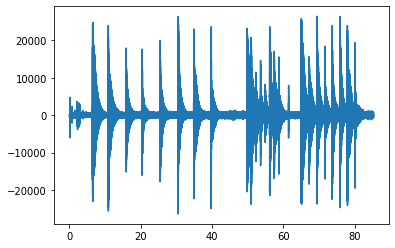

In [10]:
filename='notasMusicales.wav'                      
#winsound.PlaySound(filename, winsound.SND_FILENAME)   # Reproducimos el sonido que vamos a cargar

Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
Audio_m = data[:,0]  

L = len(Audio_m)                                      # Tomamos la longitud de la señal

n = np.arange(0,L)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal

plt.plot(n,Audio_m)
plt.show()

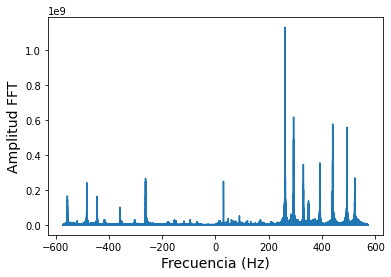

In [11]:
gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [12]:
auto = sm.tsa.acf(Audio_m, nlags=2001)
print(auto)

[1.         0.99740676 0.99014609 ... 0.2696582  0.28212663 0.29391765]


In [13]:
peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
lag = peaks[0] # Choose the first peak as our pitch component lag

In [14]:
picosDeFrecuencia = np.array([], dtype=float)
for i in range(len(peaks)):
    picosDeFrecuencia = np.append(picosDeFrecuencia, peaks[i])

In [15]:
print(picosDeFrecuencia, len(picosDeFrecuencia))

[ 178.  339.  511.  694.  808.  890. 1003. 1190. 1344. 1510. 1605. 1693.
 1805. 1869.] 14


In [16]:
lagDinamico = np.array([], dtype=float)
lagDinamico = picosDeFrecuencia
pitchMulti = np.array([], dtype=int)
for i in range(len(lagDinamico)):
    aux = int(Fs / lagDinamico[i])
    pitchMulti = np.append(pitchMulti, aux)

In [17]:
print(pitchMulti, 'Hz')
print(len(pitchMulti))

[247 130  86  63  54  49  43  37  32  29  27  26  24  23] Hz
14


In [18]:
#VALIDANDO VECINDADES
def determinarFrecuencia(pitchMulti):

    #for i in range(len(pitchMulti)):
    if pitchMulti <= 22 and pitchMulti > 16 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 25 : print(pitchMulti, 'Hz ',nombreNota[8])
    elif pitchMulti == 27 : print(pitchMulti, 'Hz ',nombreNota[9])
    elif pitchMulti == 30 : print(pitchMulti, 'Hz ',nombreNota[10])
    elif pitchMulti == 32 : print(pitchMulti, 'Hz ',nombreNota[11])

    elif pitchMulti == 34 : print(pitchMulti, 'Hz ',nombreNota[0])
    elif pitchMulti == 36 : print(pitchMulti, 'Hz ',nombreNota[1])
    elif pitchMulti == 38 : print(pitchMulti, 'Hz ',nombreNota[2])
    elif pitchMulti == 40 : print(pitchMulti, 'Hz ',nombreNota[3])
    elif pitchMulti == 42 : print(pitchMulti, 'Hz ',nombreNota[4])
    elif pitchMulti == 45 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 47 : print(pitchMulti, 'Hz ',nombreNota[6])
    elif pitchMulti == 49 or pitchMulti == 50 : print(pitchMulti, 'Hz ',nombreNota[7])
    elif pitchMulti == 51 or pitchMulti == 53 or pitchMulti == 54 : print(pitchMulti, 'Hz ',nombreNota[8])
    elif pitchMulti == 55 or pitchMulti == 57 : print(pitchMulti, 'Hz ',nombreNota[9])
    elif pitchMulti == 59 or pitchMulti == 60 : print(pitchMulti, 'Hz ',nombreNota[10])
    elif pitchMulti == 61 or pitchMulti == 63 or pitchMulti == 64 : print(pitchMulti, 'Hz ',nombreNota[11])

    elif pitchMulti == 65 or pitchMulti == 67 or pitchMulti == 68 : print(pitchMulti, 'Hz ',nombreNota[0])
    elif pitchMulti == 69 or pitchMulti == 71 or pitchMulti == 72 : print(pitchMulti, 'Hz ',nombreNota[1])
    elif pitchMulti == 73 or pitchMulti == 75 or pitchMulti == 76 : print(pitchMulti, 'Hz ',nombreNota[2])
    elif pitchMulti == 77 or pitchMulti == 79 or pitchMulti == 80 : print(pitchMulti, 'Hz ',nombreNota[3])
    elif pitchMulti == 81 or pitchMulti == 83 or pitchMulti == 84 or pitchMulti == 85 : print(pitchMulti, 'Hz ',nombreNota[4])
    elif pitchMulti == 86 or pitchMulti == 87 or pitchMulti == 89 or pitchMulti == 90 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 91 or pitchMulti == 93 or pitchMulti == 94 : print(pitchMulti, 'Hz ',nombreNota[6])
    elif pitchMulti == 95 or pitchMulti == 97 or pitchMulti == 98 or pitchMulti == 99 or pitchMulti == 100 or pitchMulti == 101 : print(pitchMulti, 'Hz ',nombreNota[7])
    elif pitchMulti == 102 or pitchMulti == 103 or pitchMulti == 105 or pitchMulti == 106 or pitchMulti == 107 : print(pitchMulti, 'Hz ',nombreNota[8])
    elif pitchMulti == 108 or pitchMulti == 109 or pitchMulti == 111 or pitchMulti == 113 or pitchMulti == 114 : print(pitchMulti, 'Hz ',nombreNota[9])
    elif pitchMulti == 115 or pitchMulti == 117 or pitchMulti == 118 or pitchMulti == 119 : print(pitchMulti, 'Hz ',nombreNota[10])
    elif pitchMulti == 120 or pitchMulti == 121 or pitchMulti == 122 or pitchMulti == 123 or pitchMulti == 125 or pitchMulti == 126 or pitchMulti == 127 : print(pitchMulti, 'Hz ',nombreNota[11])

    elif pitchMulti == 128 or pitchMulti == 129 or pitchMulti == 130 or pitchMulti == 133 or pitchMulti == 134 or pitchMulti == 135 : print(pitchMulti, 'Hz ',nombreNota[0])
    elif pitchMulti == 136 or pitchMulti == 137 or pitchMulti == 138 or pitchMulti == 141 or pitchMulti == 142 or pitchMulti == 143 : print(pitchMulti, 'Hz ',nombreNota[1])
    elif pitchMulti == 144 or pitchMulti == 145 or pitchMulti == 146 or pitchMulti == 149 or pitchMulti == 150 or pitchMulti == 151 or pitchMulti == 152 : print(pitchMulti, 'Hz ',nombreNota[2])
    elif pitchMulti == 153 or pitchMulti == 154 or pitchMulti == 155 or pitchMulti == 157 or pitchMulti == 158 or pitchMulti == 159 or pitchMulti == 160 or pitchMulti == 161 : print(pitchMulti, 'Hz ',nombreNota[3])
    elif pitchMulti == 162 or pitchMulti == 163 or pitchMulti == 165 or pitchMulti == 166 or pitchMulti == 167 or pitchMulti == 169 or pitchMulti == 170 : print(pitchMulti, 'Hz ',nombreNota[4])
    elif pitchMulti == 171 or pitchMulti == 172 or pitchMulti == 173 or pitchMulti == 174 or pitchMulti == 175 or pitchMulti == 177 or pitchMulti == 178 or pitchMulti == 179 or pitchMulti == 180 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 181 or pitchMulti == 182 or pitchMulti == 183 or pitchMulti == 185 or pitchMulti == 186 or pitchMulti == 187 or pitchMulti == 188 : print(pitchMulti, 'Hz ',nombreNota[6])
    elif pitchMulti == 189 or pitchMulti == 190 or pitchMulti == 191 or pitchMulti == 193 or pitchMulti == 194 or pitchMulti == 195 or pitchMulti == 197 or pitchMulti == 198 : print(pitchMulti, 'Hz ',nombreNota[7])
    elif pitchMulti == 203 or pitchMulti == 204 or pitchMulti == 205 or pitchMulti == 206 or pitchMulti == 207 or pitchMulti == 209 or pitchMulti == 210 or pitchMulti == 211 or pitchMulti == 212 or pitchMulti == 213 : print(pitchMulti, 'Hz ',nombreNota[8])
    elif pitchMulti == 219 or pitchMulti == 220 or pitchMulti == 221 or pitchMulti == 222 or pitchMulti == 223 or pitchMulti == 225 or pitchMulti == 226 or pitchMulti == 227 : print(pitchMulti, 'Hz ',nombreNota[9])
    elif pitchMulti == 228 or pitchMulti == 229 or pitchMulti == 230 or pitchMulti == 231 or pitchMulti == 233 or pitchMulti == 234 or pitchMulti == 235 or pitchMulti == 236 or pitchMulti == 237 : print(pitchMulti, 'Hz ',nombreNota[10])
    elif pitchMulti == 243 or pitchMulti == 244 or pitchMulti == 245 or pitchMulti == 246 or pitchMulti == 247 or pitchMulti == 249 or pitchMulti == 250 or pitchMulti == 251 or pitchMulti == 252 or pitchMulti == 253 : print(pitchMulti, 'Hz ',nombreNota[11])

    elif pitchMulti == 259 or pitchMulti == 260 or pitchMulti == 261 or pitchMulti == 262 or pitchMulti == 263 or pitchMulti == 265 or pitchMulti == 266 or pitchMulti == 267 or pitchMulti == 268 or pitchMulti == 269 : print(pitchMulti, 'Hz ',nombreNota[0])
    elif pitchMulti == 275 or pitchMulti == 276 or pitchMulti == 277 or pitchMulti == 278 or pitchMulti == 279 or pitchMulti == 281 or pitchMulti == 282 or pitchMulti == 283 or pitchMulti == 284 or pitchMulti == 285 : print(pitchMulti, 'Hz ',nombreNota[1])
    elif pitchMulti == 291 or pitchMulti == 292 or pitchMulti == 293 or pitchMulti == 294 or pitchMulti == 295 or pitchMulti == 297 or pitchMulti == 298 or pitchMulti == 299 or pitchMulti == 300 or pitchMulti == 301 : print(pitchMulti, 'Hz ',nombreNota[2])
    elif pitchMulti == 307 or pitchMulti == 308 or pitchMulti == 309 or pitchMulti == 310 or pitchMulti == 311 or pitchMulti == 313 or pitchMulti == 314 or pitchMulti == 315 or pitchMulti == 316 or pitchMulti == 317 : print(pitchMulti, 'Hz ',nombreNota[3])
    elif pitchMulti == 323 or pitchMulti == 324 or pitchMulti == 325 or pitchMulti == 326 or pitchMulti == 327 or pitchMulti == 329 or pitchMulti == 330 or pitchMulti == 331 or pitchMulti == 332 or pitchMulti == 333 : print(pitchMulti, 'Hz ',nombreNota[4])
    elif pitchMulti == 347 or pitchMulti == 348 or pitchMulti == 349 or pitchMulti == 350 or pitchMulti == 351 or pitchMulti == 353 or pitchMulti == 354 or pitchMulti == 355 or pitchMulti == 356 or pitchMulti == 357 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 363 or pitchMulti == 364 or pitchMulti == 365 or pitchMulti == 366 or pitchMulti == 367 or pitchMulti == 369 or pitchMulti == 370 or pitchMulti == 371 or pitchMulti == 372 or pitchMulti == 373 : print(pitchMulti, 'Hz ',nombreNota[6])
    elif pitchMulti == 379 or pitchMulti == 380 or pitchMulti == 381 or pitchMulti == 382 or pitchMulti == 383 or pitchMulti == 385 or pitchMulti == 386 or pitchMulti == 387 or pitchMulti == 388 or pitchMulti == 389 : print(pitchMulti, 'Hz ',nombreNota[7])
    elif pitchMulti == 411 or pitchMulti == 412 or pitchMulti == 413 or pitchMulti == 414 or pitchMulti == 415 or pitchMulti == 417 or pitchMulti == 418 or pitchMulti == 419 or pitchMulti == 420 or pitchMulti == 421 : print(pitchMulti, 'Hz ',nombreNota[8])
    elif pitchMulti == 435 or pitchMulti == 436 or pitchMulti == 437 or pitchMulti == 438 or pitchMulti == 439 or pitchMulti == 441 or pitchMulti == 442 or pitchMulti == 443 or pitchMulti == 444 or pitchMulti == 445 : print(pitchMulti, 'Hz ',nombreNota[9])
    elif pitchMulti == 459 or pitchMulti == 460 or pitchMulti == 461 or pitchMulti == 462 or pitchMulti == 463 or pitchMulti == 465 or pitchMulti == 466 or pitchMulti == 467 or pitchMulti == 468 or pitchMulti == 469 : print(pitchMulti, 'Hz ',nombreNota[10])
    elif pitchMulti == 491 or pitchMulti == 492 or pitchMulti == 493 or pitchMulti == 494 or pitchMulti == 495 or pitchMulti == 497 or pitchMulti == 498 or pitchMulti == 499 or pitchMulti == 450 or pitchMulti == 451 : print(pitchMulti, 'Hz ',nombreNota[11])

    elif pitchMulti == 523 or pitchMulti == 524 or pitchMulti == 525 or pitchMulti == 526 or pitchMulti == 527 or pitchMulti == 529 or pitchMulti == 530 or pitchMulti == 531 or pitchMulti == 532 or pitchMulti == 533 : print(pitchMulti, 'Hz ',nombreNota[0])
    elif pitchMulti == 555 or pitchMulti == 556 or pitchMulti == 557 or pitchMulti == 558 or pitchMulti == 559 or pitchMulti == 561 or pitchMulti == 562 or pitchMulti == 563 or pitchMulti == 564 or pitchMulti == 565 : print(pitchMulti, 'Hz ',nombreNota[1])
    elif pitchMulti == 587 or pitchMulti == 588 or pitchMulti == 589 or pitchMulti == 590 or pitchMulti == 591 or pitchMulti == 593 or pitchMulti == 594 or pitchMulti == 595 or pitchMulti == 596 or pitchMulti == 597 : print(pitchMulti, 'Hz ',nombreNota[2])
    elif pitchMulti == 619 or pitchMulti == 620 or pitchMulti == 621 or pitchMulti == 622 or pitchMulti == 623 or pitchMulti == 625 or pitchMulti == 626 or pitchMulti == 627 or pitchMulti == 628 or pitchMulti == 629 : print(pitchMulti, 'Hz ',nombreNota[3])
    elif pitchMulti == 651 or pitchMulti == 652 or pitchMulti == 653 or pitchMulti == 654 or pitchMulti == 655 or pitchMulti == 657 or pitchMulti == 658 or pitchMulti == 659 or pitchMulti == 660 or pitchMulti == 661 : print(pitchMulti, 'Hz ',nombreNota[4])
    elif pitchMulti == 699 or pitchMulti == 700 or pitchMulti == 701 or pitchMulti == 702 or pitchMulti == 703 or pitchMulti == 705 or pitchMulti == 706 or pitchMulti == 707 or pitchMulti == 708 or pitchMulti == 709 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 731 or pitchMulti == 732 or pitchMulti == 733 or pitchMulti == 734 or pitchMulti == 735 or pitchMulti == 737 or pitchMulti == 738 or pitchMulti == 739 or pitchMulti == 740 or pitchMulti == 741 : print(pitchMulti, 'Hz ',nombreNota[6])
    elif pitchMulti == 763 or pitchMulti == 764 or pitchMulti == 765 or pitchMulti == 766 or pitchMulti == 767 or pitchMulti == 769 or pitchMulti == 770 or pitchMulti == 771 or pitchMulti == 772 or pitchMulti == 773 : print(pitchMulti, 'Hz ',nombreNota[7])
    elif pitchMulti == 827 or pitchMulti == 828 or pitchMulti == 829 or pitchMulti == 830 or pitchMulti == 831 or pitchMulti == 833 or pitchMulti == 834 or pitchMulti == 835 or pitchMulti == 836 or pitchMulti == 837 : print(pitchMulti, 'Hz ',nombreNota[8])
    elif pitchMulti == 891 or pitchMulti == 892 or pitchMulti == 893 or pitchMulti == 894 or pitchMulti == 895 or pitchMulti == 897 or pitchMulti == 898 or pitchMulti == 899 or pitchMulti == 900 or pitchMulti == 901 : print(pitchMulti, 'Hz ',nombreNota[9])
    elif pitchMulti == 923 or pitchMulti == 924 or pitchMulti == 925 or pitchMulti == 926 or pitchMulti == 927 or pitchMulti == 929 or pitchMulti == 930 or pitchMulti == 931 or pitchMulti == 932 or pitchMulti == 933 : print(pitchMulti, 'Hz ',nombreNota[10])
    elif pitchMulti == 987 or pitchMulti == 988 or pitchMulti == 989 or pitchMulti == 990 or pitchMulti == 991 or pitchMulti == 993 or pitchMulti == 994 or pitchMulti == 995 or pitchMulti == 996 or pitchMulti == 997 : print(pitchMulti, 'Hz ',nombreNota[11])

    elif pitchMulti == 1051 or pitchMulti == 1052 or pitchMulti == 1053 or pitchMulti == 1054 or pitchMulti == 1055 or pitchMulti == 1057 or pitchMulti == 1058 or pitchMulti == 1059 or pitchMulti == 1060 or pitchMulti == 1061 : print(pitchMulti, 'Hz ',nombreNota[0])
    elif pitchMulti == 1115 or pitchMulti == 1116 or pitchMulti == 1117 or pitchMulti == 1118 or pitchMulti == 1119 or pitchMulti == 1121 or pitchMulti == 1122 or pitchMulti == 1123 or pitchMulti == 1124 or pitchMulti == 1125 : print(pitchMulti, 'Hz ',nombreNota[1])
    elif pitchMulti == 1179 or pitchMulti == 1180 or pitchMulti == 1181 or pitchMulti == 1182 or pitchMulti == 1183 or pitchMulti == 1185 or pitchMulti == 1186 or pitchMulti == 1187 or pitchMulti == 1188 or pitchMulti == 1189 : print(pitchMulti, 'Hz ',nombreNota[2])
    elif pitchMulti == 1243 or pitchMulti == 1244 or pitchMulti == 1245 or pitchMulti == 1246 or pitchMulti == 1247 or pitchMulti == 1249 or pitchMulti == 1250 or pitchMulti == 1251 or pitchMulti == 1252 or pitchMulti == 1253 : print(pitchMulti, 'Hz ',nombreNota[3])
    elif pitchMulti == 1308 or pitchMulti == 1308 or pitchMulti == 1309 or pitchMulti == 1310 or pitchMulti == 1311 or pitchMulti == 1313 or pitchMulti == 1314 or pitchMulti == 1315 or pitchMulti == 1316 or pitchMulti == 1317 : print(pitchMulti, 'Hz ',nombreNota[4])
    elif pitchMulti == 1403 or pitchMulti == 1404 or pitchMulti == 1405 or pitchMulti == 1406 or pitchMulti == 1407 or pitchMulti == 1409 or pitchMulti == 1410 or pitchMulti == 1411 or pitchMulti == 1412 or pitchMulti == 1413 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 1467 or pitchMulti == 1468 or pitchMulti == 1469 or pitchMulti == 1470 or pitchMulti == 1471 or pitchMulti == 1473 or pitchMulti == 1474 or pitchMulti == 1475 or pitchMulti == 1476 or pitchMulti == 1477 : print(pitchMulti, 'Hz ',nombreNota[6])
    elif pitchMulti == 1531 or pitchMulti == 1532 or pitchMulti == 1533 or pitchMulti == 1534 or pitchMulti == 1535 or pitchMulti == 1537 or pitchMulti == 1538 or pitchMulti == 1539 or pitchMulti == 1540 or pitchMulti == 1541 : print(pitchMulti, 'Hz ',nombreNota[7])
    elif pitchMulti == 1659 or pitchMulti == 1660 or pitchMulti == 1661 or pitchMulti == 1662 or pitchMulti == 1663 or pitchMulti == 1665 or pitchMulti == 1666 or pitchMulti == 1667 or pitchMulti == 1668 or pitchMulti == 1669 : print(pitchMulti, 'Hz ',nombreNota[8])
    elif pitchMulti == 1787 or pitchMulti == 1788 or pitchMulti == 1789 or pitchMulti == 1790 or pitchMulti == 1791 or pitchMulti == 1793 or pitchMulti == 1794 or pitchMulti == 1795 or pitchMulti == 1796 or pitchMulti == 1797 : print(pitchMulti, 'Hz ',nombreNota[9])
    elif pitchMulti == 1851 or pitchMulti == 1852 or pitchMulti == 1853 or pitchMulti == 1854 or pitchMulti == 1855 or pitchMulti == 1857 or pitchMulti == 1858 or pitchMulti == 1859 or pitchMulti == 1860 or pitchMulti == 1861 : print(pitchMulti, 'Hz ',nombreNota[10])
    elif pitchMulti == 1979 or pitchMulti == 1980 or pitchMulti == 1981 or pitchMulti == 1982 or pitchMulti == 1983 or pitchMulti == 1985 or pitchMulti == 1986 or pitchMulti == 1987 or pitchMulti == 1988 or pitchMulti == 1989 : print(pitchMulti, 'Hz ',nombreNota[11])

    elif pitchMulti == 2107 or pitchMulti == 2108 or pitchMulti == 2109 or pitchMulti == 2110 or pitchMulti == 2111 or pitchMulti == 2113 or pitchMulti == 2114 or pitchMulti == 2115 or pitchMulti == 2116 or pitchMulti == 2117 : print(pitchMulti, 'Hz ',nombreNota[0])
    elif pitchMulti == 2235 or pitchMulti == 2236 or pitchMulti == 2237 or pitchMulti == 2238 or pitchMulti == 2239 or pitchMulti == 2241 or pitchMulti == 2242 or pitchMulti == 2243 or pitchMulti == 2244 or pitchMulti == 2245 : print(pitchMulti, 'Hz ',nombreNota[1])
    elif pitchMulti == 2363 or pitchMulti == 2364 or pitchMulti == 2365 or pitchMulti == 2366 or pitchMulti == 2367 or pitchMulti == 2369 or pitchMulti == 2370 or pitchMulti == 2371 or pitchMulti == 2372 or pitchMulti == 2373 : print(pitchMulti, 'Hz ',nombreNota[2])
    elif pitchMulti == 2491 or pitchMulti == 2492 or pitchMulti == 2493 or pitchMulti == 2494 or pitchMulti == 2495 or pitchMulti == 2497 or pitchMulti == 2498 or pitchMulti == 2499 or pitchMulti == 2500 or pitchMulti == 2501 : print(pitchMulti, 'Hz ',nombreNota[3])
    elif pitchMulti == 2619 or pitchMulti == 2620 or pitchMulti == 2621 or pitchMulti == 2622 or pitchMulti == 2623 or pitchMulti == 2625 or pitchMulti == 2626 or pitchMulti == 2627 or pitchMulti == 2628 or pitchMulti == 2629 : print(pitchMulti, 'Hz ',nombreNota[4])
    elif pitchMulti == 2811 or pitchMulti == 2812 or pitchMulti == 2813 or pitchMulti == 2814 or pitchMulti == 2815 or pitchMulti == 2817 or pitchMulti == 2818 or pitchMulti == 2819 or pitchMulti == 2820 or pitchMulti == 2821 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 2939 or pitchMulti == 2940 or pitchMulti == 2941 or pitchMulti == 2942 or pitchMulti == 2943 or pitchMulti == 2945 or pitchMulti == 2946 or pitchMulti == 2947 or pitchMulti == 2948 or pitchMulti == 2949 : print(pitchMulti, 'Hz ',nombreNota[6])
    elif pitchMulti == 3067 or pitchMulti == 3068 or pitchMulti == 3069 or pitchMulti == 3070 or pitchMulti == 3071 or pitchMulti == 3073 or pitchMulti == 3074 or pitchMulti == 3075 or pitchMulti == 3076 or pitchMulti == 3077 : print(pitchMulti, 'Hz ',nombreNota[7])
    elif pitchMulti == 3323 or pitchMulti == 3324 or pitchMulti == 3325 or pitchMulti == 3326 or pitchMulti == 3327 or pitchMulti == 3329 or pitchMulti == 3330 or pitchMulti == 3331 or pitchMulti == 3332 or pitchMulti == 3333 : print(pitchMulti, 'Hz ',nombreNota[8])
    elif pitchMulti == 3579 or pitchMulti == 3580 or pitchMulti == 3581 or pitchMulti == 3582 or pitchMulti == 3583 or pitchMulti == 3585 or pitchMulti == 3586 or pitchMulti == 3587 or pitchMulti == 3588 or pitchMulti == 3589 : print(pitchMulti, 'Hz ',nombreNota[9])
    elif pitchMulti == 3707 or pitchMulti == 3708 or pitchMulti == 3709 or pitchMulti == 3710 or pitchMulti == 3711 or pitchMulti == 3713 or pitchMulti == 3714 or pitchMulti == 3715 or pitchMulti == 3716 or pitchMulti == 3717 : print(pitchMulti, 'Hz ',nombreNota[10])
    elif pitchMulti == 3963 or pitchMulti == 3964 or pitchMulti == 3965 or pitchMulti == 3966 or pitchMulti == 3967 or pitchMulti == 3969 or pitchMulti == 3970 or pitchMulti == 3971 or pitchMulti == 3972 or pitchMulti == 3973 : print(pitchMulti, 'Hz ',nombreNota[11])
    
    elif pitchMulti == 4219 or pitchMulti == 4220 or pitchMulti == 4221 or pitchMulti == 4222 or pitchMulti == 4223 or pitchMulti == 4225 or pitchMulti == 4226 or pitchMulti == 4227 or pitchMulti == 4228 or pitchMulti == 4229 : print(pitchMulti, 'Hz ',nombreNota[0])
    elif pitchMulti == 4475 or pitchMulti == 4476 or pitchMulti == 4477 or pitchMulti == 4478 or pitchMulti == 4479 or pitchMulti == 4481 or pitchMulti == 4482 or pitchMulti == 4483 or pitchMulti == 4484 or pitchMulti == 4485 : print(pitchMulti, 'Hz ',nombreNota[1])
    elif pitchMulti == 4731 or pitchMulti == 4732 or pitchMulti == 4733 or pitchMulti == 4734 or pitchMulti == 4735 or pitchMulti == 4737 or pitchMulti == 4738 or pitchMulti == 4739 or pitchMulti == 4740 or pitchMulti == 4741 : print(pitchMulti, 'Hz ',nombreNota[2])
    elif pitchMulti == 4987 or pitchMulti == 4988 or pitchMulti == 4989 or pitchMulti == 4990 or pitchMulti == 4991 or pitchMulti == 4993 or pitchMulti == 4994 or pitchMulti == 4995 or pitchMulti == 4996 or pitchMulti == 4997 : print(pitchMulti, 'Hz ',nombreNota[3])
    elif pitchMulti == 5243 or pitchMulti == 5244 or pitchMulti == 5245 or pitchMulti == 5246 or pitchMulti == 5247 or pitchMulti == 5249 or pitchMulti == 5250 or pitchMulti == 5251 or pitchMulti == 5252 or pitchMulti == 5253 : print(pitchMulti, 'Hz ',nombreNota[4])
    elif pitchMulti == 5627 or pitchMulti == 5628 or pitchMulti == 5629 or pitchMulti == 5630 or pitchMulti == 5631 or pitchMulti == 5633 or pitchMulti == 5634 or pitchMulti == 5635 or pitchMulti == 5636 or pitchMulti == 5637 : print(pitchMulti, 'Hz ',nombreNota[5])
    elif pitchMulti == 5883 or pitchMulti == 5884 or pitchMulti == 5885 or pitchMulti == 5886 or pitchMulti == 5887 or pitchMulti == 5889 or pitchMulti == 5890 or pitchMulti == 5891 or pitchMulti == 5892 or pitchMulti == 5893 : print(pitchMulti, 'Hz ',nombreNota[6])
    elif pitchMulti == 6139 or pitchMulti == 6140 or pitchMulti == 6141 or pitchMulti == 6142 or pitchMulti == 6143 or pitchMulti == 6145 or pitchMulti == 6146 or pitchMulti == 6147 or pitchMulti == 6148 or pitchMulti == 6149 : print(pitchMulti, 'Hz ',nombreNota[7])
    else:
        for i in range(12):
            notaAux = HzRedondeado[i]
            for j in range(9):
                frecuenciaAux = notaAux[j]
                if pitchMulti == frecuenciaAux : print(pitchMulti, 'Hz ',nombreNota[i])

In [19]:
for i in range(len(pitchMulti)):
    print(pitchMulti[i])

247
130
86
63
54
49
43
37
32
29
27
26
24
23


In [20]:
print(HzRedondeado)

[[   0   33   66  132  264  528 1056 2112 4224]
 [   0   35   70  140  280  560 1120 2240 4480]
 [   0   37   74  148  296  592 1184 2368 4736]
 [   0   39   78  156  312  624 1248 2496 4992]
 [   0   41   82  164  328  656 1312 2624 5248]
 [  22   44   88  176  352  704 1408 2816 5632]
 [  23   46   92  184  368  736 1472 2944 5888]
 [  24   48   96  192  384  768 1536 3072 6144]
 [  26   52  104  208  416  832 1664 3328    0]
 [  28   56  112  224  440  896 1792 3584    0]
 [  29   58  116  232  464  928 1856 3712    0]
 [  31   62  124  248  496  992 1984 3968    0]]


In [21]:
for i in range(len(pitchMulti)):
    determinarFrecuencia(pitchMulti[i])

247 Hz  Si
130 Hz  Do
86 Hz  Fa
63 Hz  Si
54 Hz  Sol#
49 Hz  Sol
37 Hz  Re
32 Hz  Si
29 Hz  La#
27 Hz  La
26 Hz  Sol#
24 Hz  Sol
23 Hz  Fa#


193 Hz  Sol
86 Hz  Fa
32 Hz  Si
107 Hz  Sol#
86 Hz  Fa
209 Hz  Sol#
129 Hz  Do
113 Hz  La
769 Hz  Sol
37 Hz  Re
37 Hz  Re
37 Hz  Re
102 Hz  Sol#
53 Hz  Sol#
193 Hz  Sol
86 Hz  Fa
156 Hz  Re#
26 Hz  Sol#
462 Hz  La#
118 Hz  La#
80 Hz  Re#
80 Hz  Re#
32 Hz  Si
102 Hz  Sol#
107 Hz  Sol#
118 Hz  La#
37 Hz  Re
123 Hz  Si
107 Hz  Sol#
123 Hz  Si
123 Hz  Si
118 Hz  La#
96 Hz  Sol
113 Hz  La
118 Hz  La#
172 Hz  Fa
193 Hz  Sol
209 Hz  Sol#
183 Hz  Fa#
32 Hz  Si
26 Hz  Sol#
53 Hz  Sol#
37 Hz  Re
48 Hz  Sol
193 Hz  Sol
183 Hz  Fa#
156 Hz  Re#
134 Hz  Do
166 Hz  Mi
37 Hz  Re
269 Hz  Do
269 Hz  Do
150 Hz  Re
527 Hz  Do
32 Hz  Si
371 Hz  Fa#
183 Hz  Fa#
166 Hz  Mi
166 Hz  Mi
161 Hz  Re#
161 Hz  Re#
177 Hz  Fa
32 Hz  Si
37 Hz  Re
32 Hz  Si
32 Hz  Si
32 Hz  Si
48 Hz  Sol
26 Hz  Sol#
26 Hz  Sol#
349 Hz  Fa
26 Hz  Sol#
32 Hz  Si
26 Hz  Sol#
26 Hz  Sol#
26 Hz  Sol#
37 Hz  Re
123 Hz  Si
129 Hz  Do
96 Hz  Sol
64 Hz  Si
129 Hz  Do
123 Hz  Si
123 Hz  Si
80 Hz  Re#
145 Hz  Re
64 Hz  Si
107 Hz  Sol#
107 Hz  So

TypeError: only size-1 arrays can be converted to Python scalars

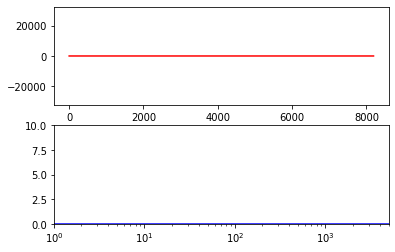

In [22]:
matplotlib.use('TkAgg')

FRAMES = 1024*8                                   # Tamaño del paquete a procesar
FORMAT = pa.paInt16                               # Formato de lectura INT 16 bits
CHANNELS = 1
Fs = 44100                                        # Frecuencia de muestreo típica para audio

p = pa.PyAudio()

stream = p.open(                                  # Abrimos el canal de audio con los parámeteros de configuración
    format = FORMAT,
    channels = CHANNELS,
    rate = Fs,
    input=True,
    output=True,
    frames_per_buffer=FRAMES
)

## Creamos una gráfica con 2 subplots y configuramos los ejes

fig, (ax,ax1) = plt.subplots(2)

x_audio = np.arange(0,FRAMES,1)
x_fft = np.linspace(0, Fs, FRAMES)
line, = ax.plot(x_audio, np.random.rand(FRAMES),'r')
line_fft, = ax1.semilogx(x_fft, np.random.rand(FRAMES), 'b')

ax.set_ylim(-32500,32500)
ax.ser_xlim = (0,FRAMES)
Fmin = 1
Fmax = 5000
ax1.set_xlim(Fmin,Fmax)

fig.show()


F = (Fs/FRAMES)*np.arange(0,FRAMES//2)                 # Creamos el vector de frecuencia para encontrar la frecuencia dominante

while True:
    
    data = stream.read(FRAMES)                         # Leemos paquetes de longitud FRAMES
    dataInt = struct.unpack(str(FRAMES) + 'h', data)   # Convertimos los datos que se encuentran empaquetados en bytes
    
    line.set_ydata(dataInt)                            # Asignamos los datos a la curva de la variación temporal
    
    M_gk = abs(fourier.fft(dataInt)/FRAMES)            # Calculamos la FFT y la Magnitud de la FFT del paqute de datos

    
    ax1.set_ylim(0,np.max(M_gk+10)) 
    line_fft.set_ydata(M_gk)                           # Asigmanos la Magnitud de la FFT a la curva del espectro 
    
    M_gk = M_gk[0:FRAMES//2]                           # Tomamos la mitad del espectro para encontrar la Frecuencia Dominante
    Posm = np.where(M_gk == np.max(M_gk))
    F_fund = F[Posm]                                   # Encontramos la frecuencia que corresponde con el máximo de M_gk
    FrecuenciaAproximada = int(F_fund)                 # Volvemos entera la frecuencia maxima.
    
    determinarFrecuencia(FrecuenciaAproximada)

    fig.canvas.draw()
    fig.canvas.flush_events()

In [1]:
from tkinter import *

In [31]:
ventana = Tk()                                                                          #Definicion de la ventana.                                                 #
ventana.geometry("230x600")
ventana.title("Afinador Vocal")



valor = 2
boton2 = Label (ventana, text=valor)
boton2.pack()
boton3 = Label (ventana, background="red")
boton3.pack()



ventana.mainloop()

lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
